In [2]:
import json
import numpy as np
import pandas as pd
import uproot
import matplotlib.pyplot as plt
import mplhep as mh

from hist.hist import Hist
from hist.axis import Regular

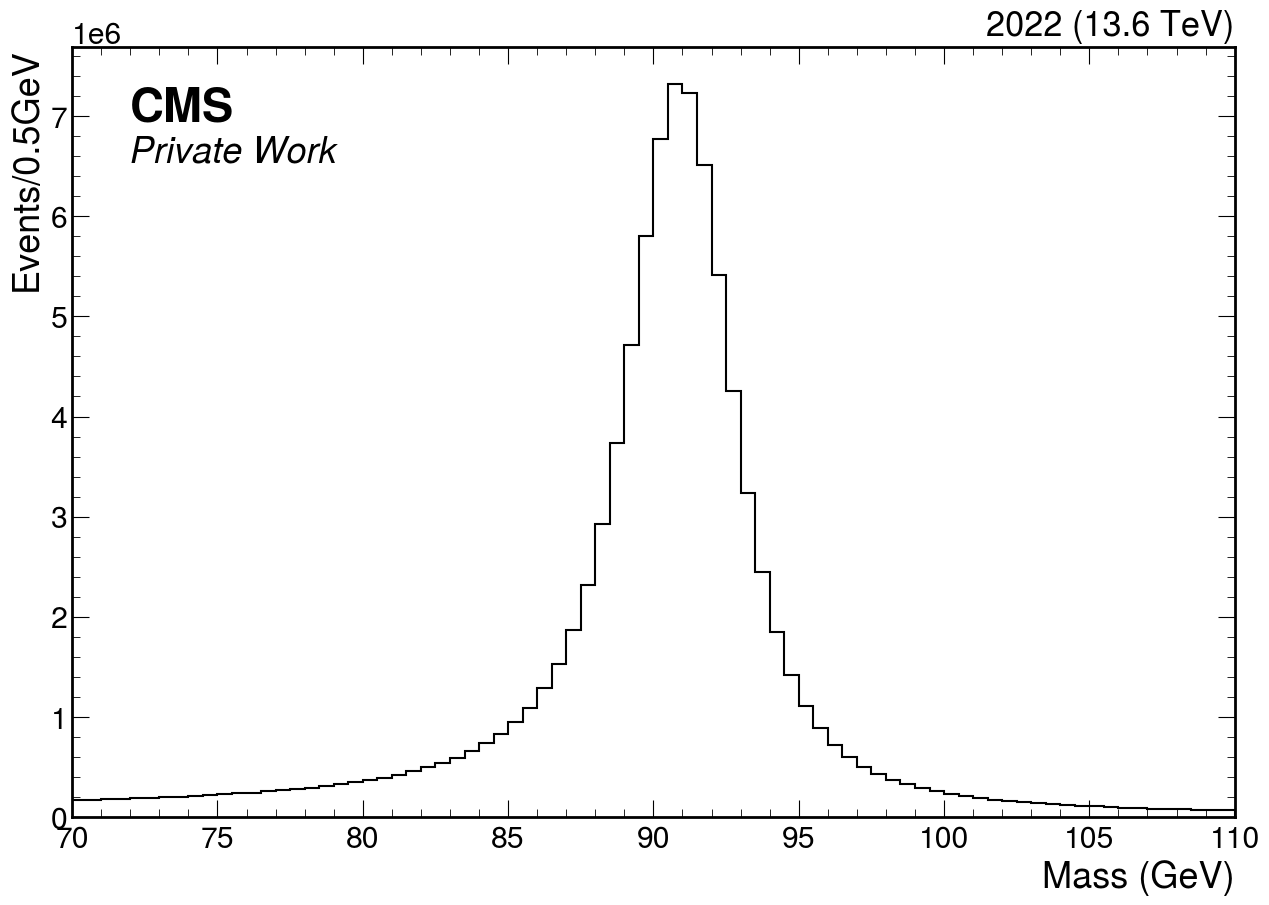

In [3]:
#dimuon mass를 그냥 is_matched로 나눠서 그리면 되지 않을까
path_mass = '/home/sourcemaru/OneDrive/RPC/TnP/Workspace/data/tnp-nanoaod-flatten/Run2022.root'

mass = uproot.open(f"{path_mass}:tree/dimuon_mass").array(library="np")

mh.style.use(mh.styles.CMS)
fig, ax = plt.subplots(figsize=(15, 10))
mh.cms.label(ax=ax, llabel=f'Private Work', com=13.6, year="2022", loc=2)

ax.set_xlabel('Mass (GeV)')
ax.set_ylabel('Events/0.5GeV')
ax.set_xlim(70, 110)

h_mass = Hist(Regular(80, 70, 110))
h_mass.fill(mass)

h_mass.plot(
    ax = ax,
    yerr = False,
    histtype="step",
    color="black",
    linewidth=1.5,
    flow=None,
)

fig.savefig("./output/MassHistogram2022.pdf")
fig.savefig("./output/MassHistogram2022.png")

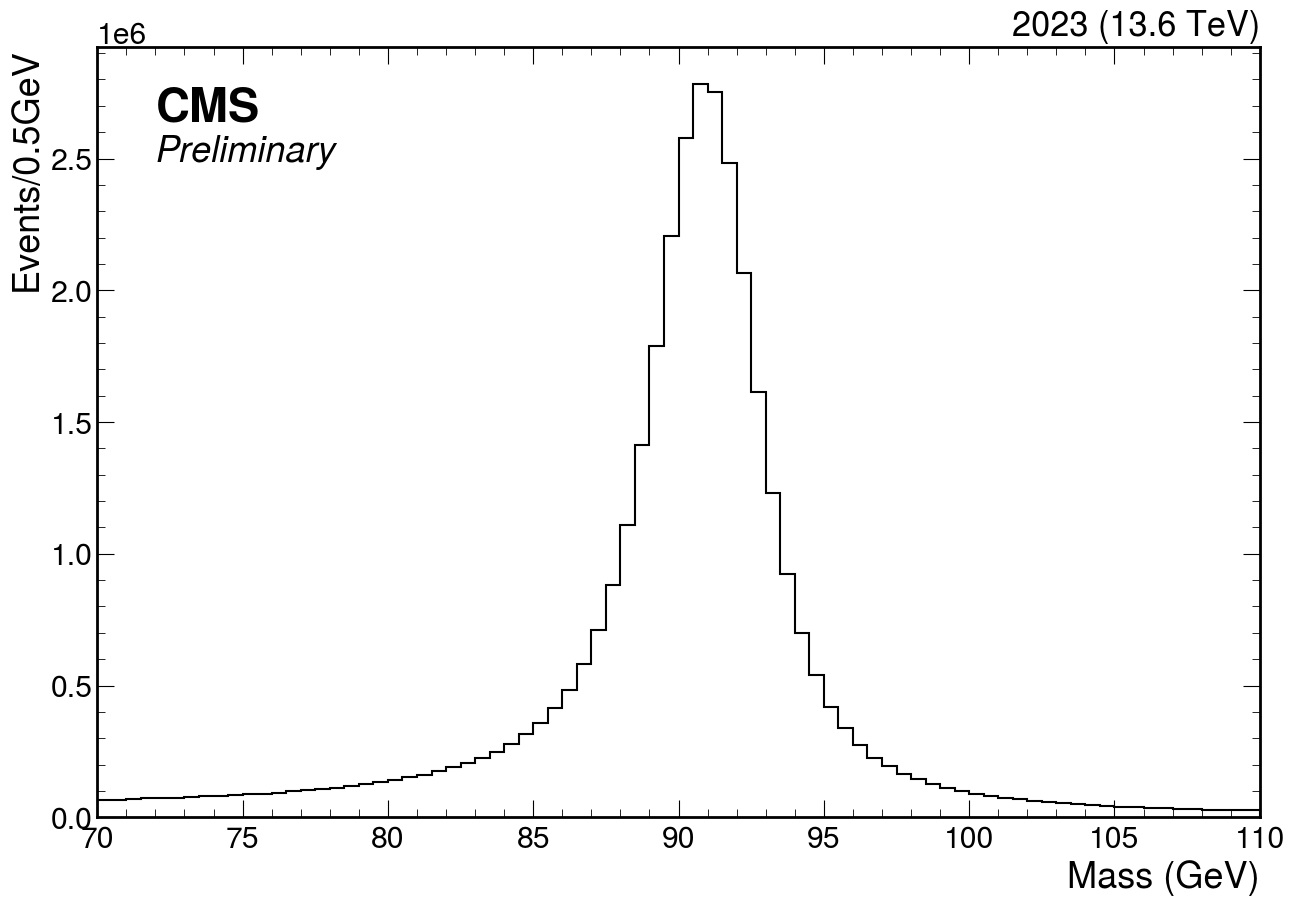

In [30]:
path_mass = '/home/sourcemaru/OneDrive/RPC/TnP/Workspace/data/tnp-nanoaod-flatten/Run2023.root'

mass = uproot.open(f"{path_mass}:tree/dimuon_mass").array(library="np")

mh.style.use(mh.styles.CMS)
fig, ax = plt.subplots(figsize=(15, 10))
mh.cms.label(ax=ax, llabel=f'Preliminary', com=13.6, year="2023", loc=2)

ax.set_xlabel('Mass (GeV)')
ax.set_ylabel('Events/0.5GeV')
ax.set_xlim(70, 110)

h_mass = Hist(Regular(80, 70, 110))
h_mass.fill(mass)

h_mass.plot(
    ax = ax,
    yerr = False,
    histtype="step",
    color="black",
    linewidth=1.5,
    flow=None,
)

fig.savefig("./output/MassHistogram2023.pdf")
fig.savefig("./output/MassHistogram2023.png")

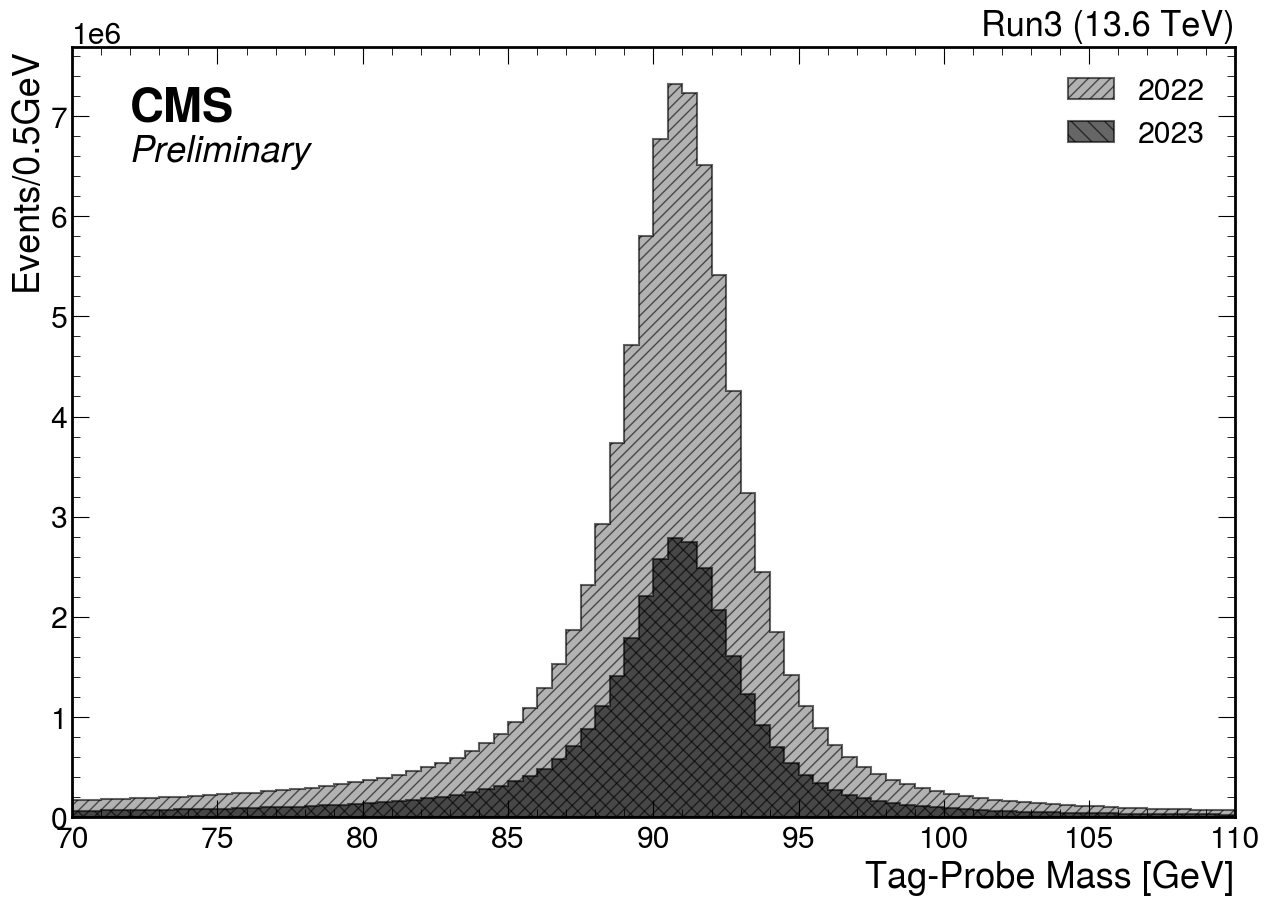

In [33]:
path_mass_2022 = '/home/sourcemaru/OneDrive/RPC/TnP/Workspace/data/tnp-nanoaod-flatten/Run2022.root'
path_mass_2023 = '/home/sourcemaru/OneDrive/RPC/TnP/Workspace/data/tnp-nanoaod-flatten/Run2023.root'


mass_2022 = uproot.open(f"{path_mass_2022}:tree/dimuon_mass").array(library="np")
mass_2023 = uproot.open(f"{path_mass_2023}:tree/dimuon_mass").array(library="np")

mh.style.use(mh.styles.CMS)
fig, ax = plt.subplots(figsize=(15, 10))
mh.cms.label(ax=ax, llabel=f'Preliminary', com=13.6, year="Run3", loc=2)

ax.set_xlabel('Tag-Probe Mass [GeV]')
ax.set_ylabel('Events/0.5GeV')
ax.set_xlim(70, 110)

h_mass_2022 = Hist(Regular(80, 70, 110))
h_mass_2023 = Hist(Regular(80, 70, 110))

h_mass_2022.fill(mass_2022)
h_mass_2023.fill(mass_2023)

h_mass_2022.plot(
    ax = ax,
    yerr = False,
    histtype="fill",
    linewidth=1.5,
    flow=None,
    label="2022",
    hatch="///",
    alpha=0.6,
    edgecolor='black',
    facecolor='gray'


)

h_mass_2023.plot(
    ax = ax,
    yerr = False,
    histtype="fill",
    edgecolor='black',
    facecolor='black',
    linewidth=1.5,
    hatch='\\\\',
    flow=None,
    label="2023",
    alpha=0.6

)

ax.legend()

fig.savefig("./output/MassHistogramRun3.pdf")
fig.savefig("./output/MassHistogramRun3.png")

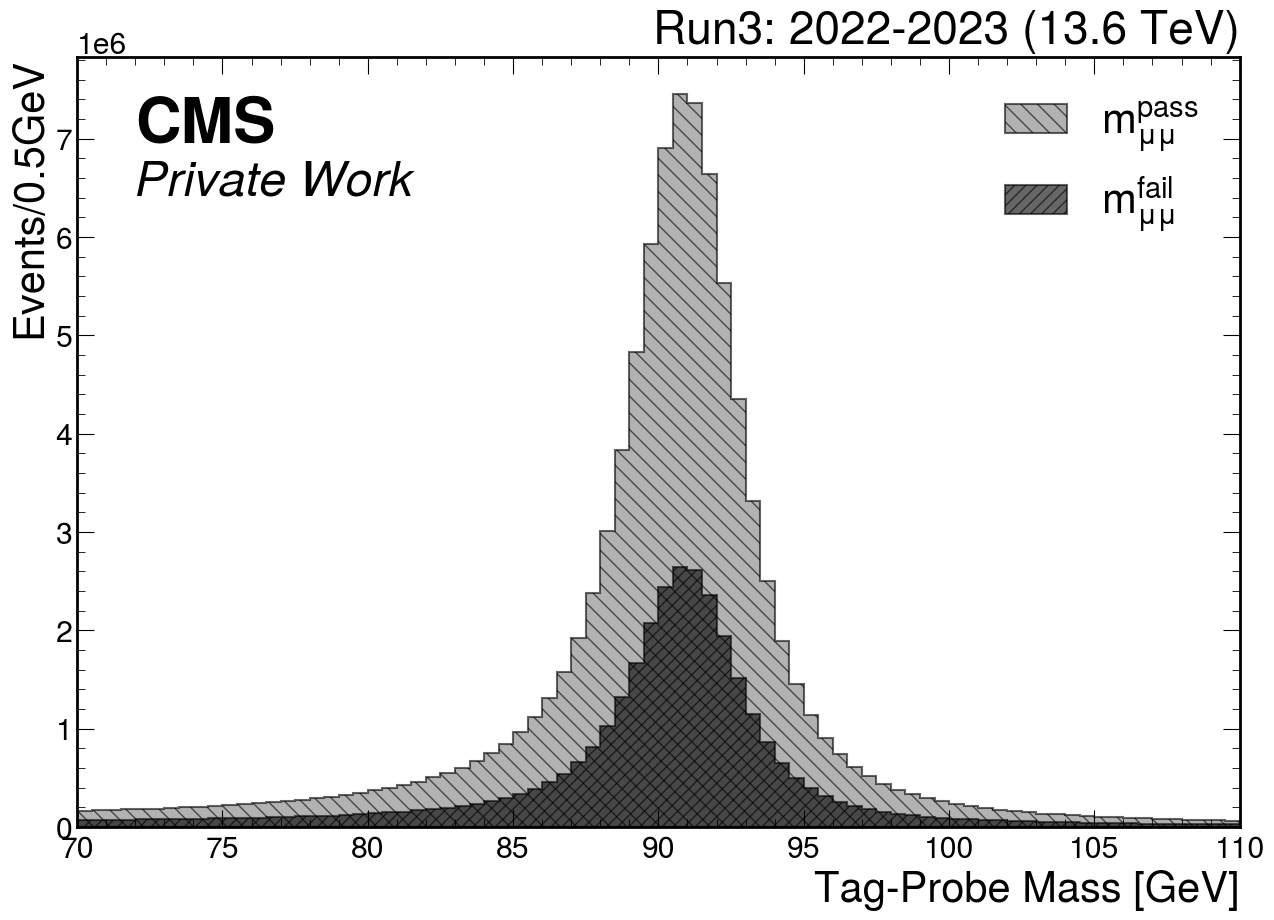

In [20]:
path_mass_2022 = '/home/sourcemaru/OneDrive/RPC/TnP/Workspace/data/tnp-nanoaod-flatten/Run2022.root'
path_mass_2023 = '/home/sourcemaru/OneDrive/RPC/TnP/Workspace/data/tnp-nanoaod-flatten/Run2023.root'


mass_2022 = uproot.open(f"{path_mass_2022}:tree/dimuon_mass").array(library="np")
mass_2023 = uproot.open(f"{path_mass_2023}:tree/dimuon_mass").array(library="np")

is_matched_2022 = uproot.open(f"{path_mass_2022}:tree/is_matched").array(library="np")
is_matched_2023 = uproot.open(f"{path_mass_2023}:tree/is_matched").array(library="np")

matched_mass_2022 = mass_2022[is_matched_2022]
matched_mass_2023 = mass_2023[is_matched_2023]

un_matched_mass_2022 = mass_2022[~is_matched_2022]
un_matched_mass_2023 = mass_2023[~is_matched_2023]


mass_run3 = np.concatenate((mass_2022, mass_2023))
matched_mass_run3 = np.concatenate((matched_mass_2022, matched_mass_2023))
unmatched_mass_run3 = np.concatenate((un_matched_mass_2022, un_matched_mass_2023))


mh.style.use(mh.styles.CMS)
fig, ax = plt.subplots(figsize=(15, 10))
mh.cms.label(ax=ax, llabel=f'Private Work', com=13.6, year="Run3: 2022-2023", loc=2, fontsize=35)

ax.set_xlabel('Tag-Probe Mass [GeV]', fontsize=30)
ax.set_ylabel('Events/0.5GeV', fontsize=30)
ax.set_xlim(70, 110)

h_mass_run3 = Hist(Regular(80, 70, 110))
h_matched_mass_run3 = Hist(Regular(80, 70, 110))
h_unmatched_mass_run3 = Hist(Regular(80, 70, 110))

h_mass_run3.fill(mass_run3)
h_matched_mass_run3.fill(matched_mass_run3)
h_unmatched_mass_run3.fill(unmatched_mass_run3)


"""
h_mass_run3.plot(
    ax = ax,
    yerr = False,
    histtype="fill",
    linewidth=1.5,
    flow=None,
    label=r"$m_{\mu\mu}^{pass + fail}$",
    hatch="///",
    alpha=0.6,
    edgecolor='black',
    facecolor='gray'


)
"""
h_matched_mass_run3.plot(
    ax = ax,
    yerr = False,
    histtype="fill",
    edgecolor='black',
    facecolor='gray',
    linewidth=1.5,
    hatch='\\\\',
    flow=None,
    label=r"$m_{\mu\mu}^{pass}$",
    alpha=0.6

)
h_unmatched_mass_run3.plot(
    ax = ax,
    yerr = False,
    histtype="fill",
    edgecolor='black',
    facecolor='black',
    linewidth=1.5,
    hatch='///',
    flow=None,
    label=r"$m_{\mu\mu}^{fail}$",
    alpha=0.6

)


ax.legend(fontsize=30)

fig.savefig("./output/MassHistogramRun3_2.pdf")
fig.savefig("./output/MassHistogramRun3_2.png")